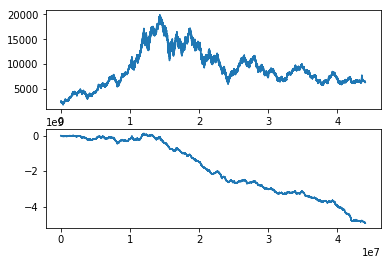

In [1]:
import pandas as pd
df_b = pd.read_csv("bitfinex_BTCUSD_1499503811000_1540938106535.csv")
df_b["total"] = df_b["price"]*df_b["volume"]
price_list = df_b.price.values.tolist()
volume_list = df_b.volume.values.tolist()
total_list = df_b.total.values.tolist()
sum_volume_list = []
sum_volume = 0
sum_total_list = []
sum_total = 0
for t in range(len(volume_list)):
    sum_volume = sum_volume+volume_list[t]
    sum_volume_list.append(sum_volume)
    sum_total = sum_total+total_list[t]
    sum_total_list.append(sum_total)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(price_list)
plt.subplot(2,1,2)
plt.plot(sum_total_list)

In [ ]:
'''
here are the source codes of using file coinbaseUSD.csv and bitfinex_BTCUSD_1499503811000_1540938106535.csv 
to produce file temp_1499503811000_1540938106535.csv
which is the table of describing the differ value between coinbase and bitfinex
'''

import pandas as pd
import time
column_names = ['TS','price','volume']
df = pd.read_csv("coinbaseUSD.csv",header=None)
df.columns = column_names

df = df[df["TS"]>1499503811]
df = df[df["TS"]<=1540938106]

df_b = pd.read_csv("bitfinex_BTCUSD_1499503811000_1540938106535.csv")
volume_list = df_b.volume.values.tolist()
sum_list = []
sum_volume = 0
for t in range(len(volume_list)):
    sum_volume = sum_volume+volume_list[t]
    sum_list.append(sum_volume)
df_b["sum_volume"]=sum_list

df["TS"] = df["TS"]*1000
df = df.reset_index()
df = df[["TS","price"]]
df = df.rename(columns={"price": "price_c"})
df_b = df_b[["TS","price","sum_volume"]]
df_b = df_b.rename(columns={"price": "price_b"})

result = df.merge(df_b, how='outer')
result = result.drop_duplicates()
result = result.sort_values(by=['TS'])

import math
differ_list = []
new_b_list = []
new_v_list = []
price_c_list = result.price_c.values.tolist()
price_b_list = result.price_b.values.tolist()
old_v_list = result.sum_volume.values.tolist()
last_c = float('nan')
last_b = float('nan')
last_v = float('nan')
for t in range(len(price_c_list)):
    price_c = price_c_list[t]
    price_b = price_b_list[t]
    if(not math.isnan(price_c)):
        last_c = price_c
    if(not math.isnan(price_b)):
        last_b = price_b
        last_v = old_v_list[t]
    new_b_list.append(last_b)
    new_v_list.append(last_v)
    if(math.isnan(last_c) or math.isnan(last_b)):
        differ_list.append(0)
    else:
        differ_list.append(last_b-last_c)
result["differ"] =  differ_list
result["new_b"] =  new_b_list
result["new_sum_volume"] =  new_v_list
result["differ_percent"] = result["differ"]/result["new_b"]
price_list = result.new_b.values.tolist()
differ_list = result.differ_percent.values.tolist()
volume_list = result.new_sum_volume.values.tolist()

cols = ['TS', 'differ', 'price']
TS_list = result.TS.values.tolist()
df = pd.DataFrame(columns=cols)
df['differ'] = differ_list
df['price'] = price_list
df['TS'] = TS_list
df.to_csv("temp_1499503811000_1540938106535.csv")

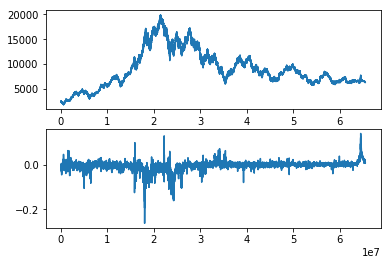

In [1]:
import pandas as pd
df = pd.read_csv("temp_1499503811000_1540938106535.csv")
price_list = df.price.values.tolist()
differ_list = df.differ.values.tolist()
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(price_list)
plt.subplot(2,1,2)
plt.plot(differ_list)